In [1]:
%load_ext autoreload
%autoreload 2


import numpy as np
import sys

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from IHANKModel import IHANKModelClass
import figures 
import calculations


In [2]:
run_test = False
path = '/Users/emmagundersen/Desktop/Current code/I_HANK_PIGL_BACKUP/fig/0403/'
lvl_path = ['U_hh', 'Walras', 'CB', 'i', 'NX', 'CA', 'ra', 'iF_s',  'iF_s']
# paths = ['U_hh','PTH_s', 'PF_s', 'E', 'PF', 'YTH', 'YNT', 'CTF', 'CT', 'CNT','CTH_s', 'i', 'ra', 'iF_s']
var_agregate_goals = ['PF', 'PT', 'P', 'PE', 'PNT','CE', 'CTF', 'CT', 'i', 'U', 'CTH_s']

# Paths 
path_philips= ['WTH', 'WNT', 'NTH', 'NNT', 'PTH', 'PNT', 'PF', 'UC_TH_hh', 'UC_NT_hh', 'EX']
paths_hh = ['U_hh', 'CNT_hh', 'CT_hh', 'CTH', 'CTF', 'CNT', 'EX', 'inc_NT', 'inc_TH', 'ra']
paths_s = ['iF_s', 'rF', 'E', 'PF_s', 'PF', 'CTH_s', 'PTH_s']

paths = ['YH',  'W', 'P', 'CT', 'CNT', 'CTH_s', 'i', 'ra',  'r_real']
lvl_path = ['ra', 'i', 'iF_s']


In [3]:
# Paths 
path_philips= ['WTH', 'WNT', 'NTH', 'NNT', 'PTH', 'PNT', 'PF', 'UC_TH_hh', 'UC_NT_hh', 'EX']
paths_hh = ['U_hh', 'CNT_hh', 'CT_hh', 'CTH', 'CTF', 'CNT', 'EX', 'inc_NT', 'inc_TH', 'ra']
paths_s = ['iF_s', 'rF', 'E', 'PF_s', 'PF', 'CTH_s', 'PTH_s']

## Initial model

In [5]:
model = IHANKModelClass(name='baseline')
model.par.nu = 1.0
model.par.eta_s = 0.01
model.par.etaF = 0.01
model.par.etaE = 0.001
model.par.float = True
model.par.pf_fixed = True
model.par.mon_policy = 'real'
model.find_ss(do_print=False)
model.compute_jacs()

shock_PE_s, shock_forigne_interest, shock_PF_s, shock_PF_s_taylor, shock_PE_PF, shock_PE_PF_taylor, shock_i = calculations.difine_shocks(model) 

Share of domestic workers in tradable sector = 0.50


NNT: terminal value is   0.50045118, but ss value is   0.50041179
piWTH: terminal value is   0.00000274, but ss value is   0.00000000
piWNT: terminal value is   0.00000302, but ss value is   0.00000000
YNT: terminal value is   0.50045118, but ss value is   0.50041179
WTH: terminal value is   1.02129136, but ss value is   1.00000000
WNT: terminal value is   1.02130999, but ss value is   1.00000000
PTH: terminal value is   1.02129136, but ss value is   1.00000000
PNT: terminal value is   1.02130999, but ss value is   1.00000000
PTH_s: terminal value is   1.02129136, but ss value is   1.00000000
PT: terminal value is   1.02150377, but ss value is   1.00000000
P: terminal value is   1.02144796, but ss value is   1.00000000
pi_F: terminal value is   0.00000283, but ss value is   0.00000000
pi_NT: terminal value is   0.00000302, but ss value is   0.00000000
pi_TH: terminal value is   0.00000274, but ss value is   0.00000000
pi_T: terminal value is   0.00000277, but ss value is   0.00000000
p

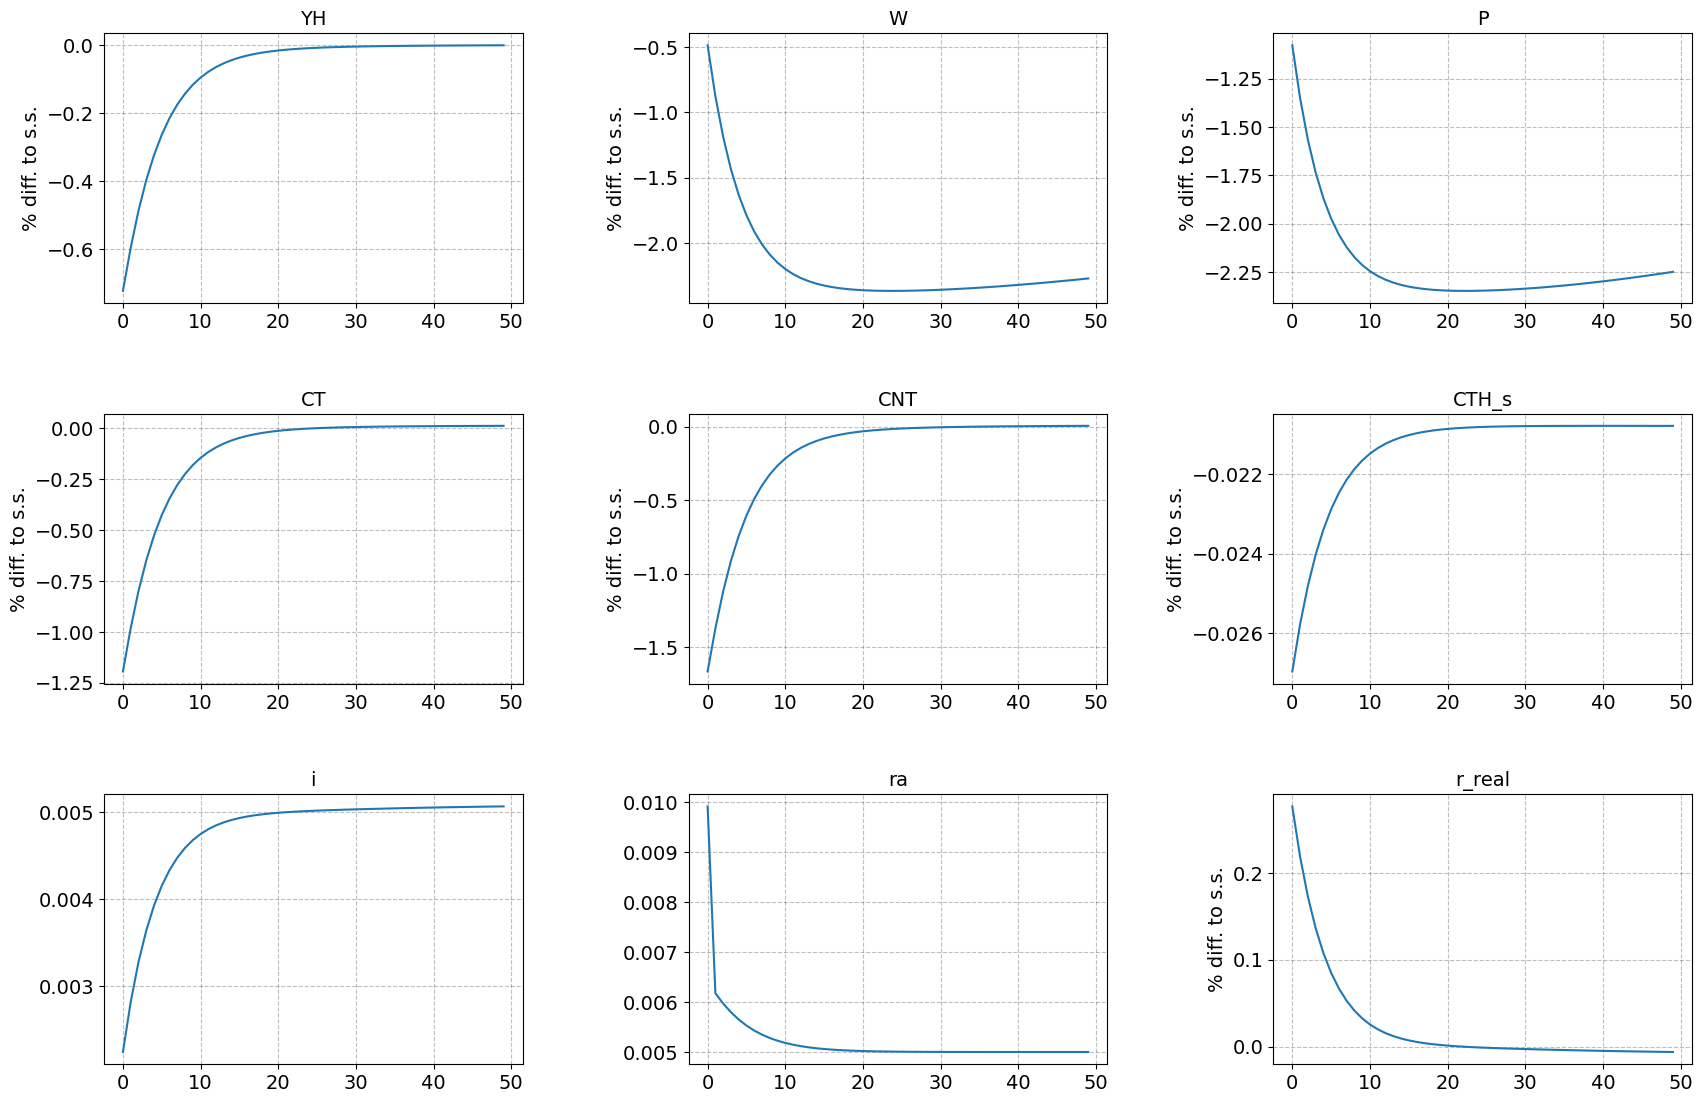

In [6]:


model.find_transition_path(shocks=shock_PE_s, do_end_check=False)
model.show_IRFs(paths, T_max=50, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)


In [ ]:
model.show_IRFs(paths, T_max=50, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

In [ ]:
model.find_transition_path(shocks=shock_PF_s, do_end_check=False)


In [ ]:
model.show_IRFs(['PT', 'PNT'], T_max=50, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

In [ ]:
paths_new = paths.copy()
paths_new.append('iF_s')
model.show_IRFs(paths_new, T_max=50, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

In [ ]:
# plt.plot(model.path.P, label='P')
# plt.plot(model.path.W, label='W')
# # real 
plt.plot(model.path.W/model.path.P, label='rwage')
plt.legend()

In [ ]:
model.show_IRFs(['P', 'PF', 'E', 'PF_s', 'PTH'], T_max=50, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

In [ ]:
print(f'SS u: {model.ss.U_hh} After shock U: ({model.path.U_hh[0]}')

In [ ]:
fixed = model.copy(name='fixed')
fixed.par.float = False
fixed.find_ss()
fixed.compute_jacs()

fixed.par.jump_i_shock = -0.025 # initial jump
fixed.par.rho_i_shock = 0.80 # AR(1) coefficeint

fixed.find_transition_path(shocks=['i_shock'])
fixed.show_IRFs(fixed.varlist, T_max=50, ncols=3)

In [ ]:
model.show_IRFs(model.varlist, T_max=50, ncols=3)

In [ ]:
model.par.jump_M_s = -0.03 # initial jump
model.par.rho_M_s = 0.03 # AR(1) coefficeint

model.find_transition_path(shocks=['M_s'], do_end_check=False)


In [ ]:
shocks = [shock_PE_s, shock_forigne_interest, shock_PF_s, shock_PF_s_taylor]

for shock in shocks:
    try:
        model.find_transition_path(shocks=shock, do_end_check=False)
        print(f'{shock.keys()} worked')
    except:
        print(f'{shock.keys()} did not work')
        pass


# model.show_IRFs(model.varlist, do_targets=False, do_shocks=True, T_max=50, lvl_value=lvl_path, ncols=3)

In [ ]:
model.test_jacs()

In [ ]:
calculations.test_model_properties([model])

In [ ]:
model.show_IRFs()

In [ ]:
model.show_IRFs(model.varlist, do_targets=False, do_shocks=False, T_max=50, lvl_value=lvl_path, )

In [ ]:
model.show_IRFs(model.varlist, do_targets=True, do_shocks=True, T_max=50)

In [ ]:
run_test = True
if run_test: 
    print('Running tests')


    # # a. Policy 
    # figures.plot_policy(model, ['a', 'e', 'ct', 'cnt', 'cth', 'ctf', 'u'])

    # # b. Non homothetic expenditure
    # a_ = model.ss.a[0,3,:]*model.ss.PNT
    # e_ = model.ss.e[0,3,:]*model.ss.PNT
    # ect_ = model.ss.ct[0,3,:]*model.ss.PT
    # ecnt_ = model.ss.cnt[0,3,:]*model.ss.PNT
    # share_ = ect_/(ecnt_+ect_)

    # plt.figure()
    # plt.plot(e_,share_)
    # plt.xlabel('Total expenditure')
    # plt.ylabel('Expenditure share tradable goods')
    # plt.title('Non-homothetic expenditure shares')

    # # c. tests
    # model.test_hh_path()
    # model.test_path()
    model.test_jacs()




# run_test = False     

# Model with floating exhcange rate 

In [ ]:
model.par.mon_policy = 'taylor'
model.find_ss()
model.compute_jacs()
model.find_transition_path(shock_PF_s_taylor, do_end_check=False)

In [ ]:
calculations.test_model_properties([model])

In [ ]:


print(shock_PF_s_taylor.keys())

In [ ]:
# forign country follows taylor rule # THIS DOES NOT MAKE SENCE IF INFLATION IS FIXED


In [ ]:



print('Testting model with properties')
model_ = model.copy(name='')
model_.pf_fixed = True # forign inflation level fixed options true or false
print(f'foring inflation fixed = {model_.pf_fixed}')
model_.par.mon_policy == 'real'# domestic policy rule options 'taylor' of 'real'
print(f'domestic policy rule = {model_.par.mon_policy}')
shock = shock_PF_s_taylor # forign country follows taylor rule options shock_PF_s_taylor and shock_PF_s_real
print(f'forigne shock: {shock.keys()}')
model_.find_transition_path(shock, do_end_check=False)
calculations.test_model_properties([model_])
print('\n')


In [ ]:
# Assuming model, shock_PF_s_taylor, shock_PF_s_real, and calculations are already defined

# Define the options for each property
pf_fixed_options = [True, False]
mon_policy_options = ['taylor']#, 'real']
mon_policy_float = False
shock_options = {'shock_PF_s_taylor': shock_PF_s_taylor, 'shock_PF_s_real': shock_PF_s_real}

# Loop through each combination of options
for pf_fixed in pf_fixed_options:
    for mon_policy in mon_policy_options:
        for shock_name, shock in shock_options.items():
            print('Testing model with properties')
            try:
                model_ = model.copy(name='')
                
                # Create a copy of the model with a new name
                model_ = model.copy(name=f'model_pf_fixed_{pf_fixed}_mon_policy_{mon_policy}_shock_{shock_name}')
                
                # Set the properties
                model_.par.pf_fixed = pf_fixed
                print(f'foreign inflation fixed = {model_.par.pf_fixed}')
                
                model_.par.float = mon_policy_float
                print(f'floating exchange rate = {model_.par.float}')
                model_.par.mon_policy == mon_policy
                print(f'domestic policy rule = {model_.par.mon_policy}')
                
                print(f'foreign shock: {shock.keys()}')
                
                # Find the transition path
                model_.find_transition_path(shock, do_end_check=False)
                
                # Test the model properties
                calculations.test_model_properties([model_])  
            except Exception as e:
                print(f'Error: {e}')
            
            print('\n')

# # Testing first options 
# model_ = model.copy(name='')
# model_.par.pf_fixed = True
# model_.par.mon_policy == 'taylor'
# model_.find_transition_path(shock_PF_s_taylor, do_end_check=False)

In [ ]:
model_ = model.copy(name='')
model_.par.pf_fixed = True
model_.par.float = False
model_.find_ss()
model_.compute_jacs()
model_.find_transition_path(shock_PF_s_taylor, do_end_check=False)
# calculations.test_model_properties([model_])

In [ ]:
var_agregate_goals = ['PF', 'PT', 'P', 'CTF', 'CT', 'i', 'U', 'r_real']


In [ ]:
def test_model_properties(models):
    # Define the conditions to be tested
    conditions = [
        ('PF increase', lambda model: model.path.PF[0] > model.ss.PF),
        ('PT increases', lambda model: model.path.PT[0] > model.ss.PT),
        ('P increases', lambda model: model.path.P[0] > model.ss.P),
        ('CTF decreases', lambda model: model.path.CTF[0] < model.ss.CTF),
        ('i increases', lambda model: model.path.i[0] > model.ss.i),
        ('U decreases', lambda model: model.path.U_hh[0] < model.ss.U_hh)
    ]

    for model in models:
        print(f'\nTesting the aggregate properties of {model.name}')
        
        # Initialize lists to store fulfilled and unfulfilled conditions
        fulfilled = []
        unfulfilled = []

        # Test each condition
        for condition_name, condition_func in conditions:
            if condition_func(model):
                fulfilled.append(condition_name)
            else:
                unfulfilled.append(condition_name)

        # Print the results
        print('Fulfilled conditions:')
        for condition in fulfilled:
            print(f'  {condition}')

        print('Unfulfilled conditions:')
        for condition in unfulfilled:
            print(f'  {condition}')

# Example usage
test_model_properties([model_PF_s_real])

In [ ]:
def test_model_properties(models):


    for model in models:
        print(f'\nTesting the agregate poperties of {model.name}')

        print(f'PF increase: {model.path.PF[0]>model.ss.PF}')
        print(f'PT increases: {model.path.PT[0]>model.ss.PT}')
        print(f'P increases: {model.path.P[0]>model.ss.P}')
        print(f'CTF decreases: {model.path.CTF[0]<model.ss.CTF}')
        print(f'i increases: {model.path.i[0]>model.ss.i}')
        print(f'U decreases: {model.path.U_hh[0]<model.ss.U_hh}')

test_model_properties([model_PF_s_real, model_PF_s_taylor])


In [ ]:
# model_PF_s_real = model.copy('Real forigne rule')
# model_PF_s_real.find_transition_path(shock_PF_s_real, do_end_check=False)
# model_PF_s_real.show_IRFs(model.varlist, lvl_value=lvl_path, T_max=500, ncols=3, do_targets=False)


def test_model_properties(mdoel)

print(f'PF increase: {model_.path.PF[0]>model_.ss.PF}')
print(f'PT increases: {model_.path.PT[0]>model_.ss.PT}')
print(f'P increases: {model_.path.P[0]>model_.ss.P}')
print(f'CTF decreases: {model_.path.CTF[0]<model_.ss.CTF}')
print(f'i increases: {model_.path.i[0]>model_.ss.i}')
print(f'U decreases: {model_.path.U_hh[0]<model.ss.U_hh}')

In [ ]:
model_PF_s_real.ss.U_hh

In [ ]:
model_PF_s_real.path.U[0]

In [ ]:
model_PF_s_real.show_IRFs(var_agregate_goals, lvl_value=lvl_path, T_max=500, ncols=3, do_targets=False, do_shocks=False)

In [ ]:
model_PF_s_taylor.compare_IRFs(models=[model_PF_s_taylor, model_PF_s_real], labels=['model_PF_s_taylor', 'model_PF_s_real'], varnames=var_agregate_goals, T_max=50, ncols=3, do_shocks=False)

In [ ]:
# 
def plot_UIP(model):
                    
    path = model.path

    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(1,2,1)


    # ax1.plot((1+path.E[1,:])/(1+path.E[0,:]), label= 'RHS= (1+E_t)/(1+E_{t-1})')
    # Corrected code

    ax1.plot((1+path.iF_s[:-1,0])*(path.E[1:, 0]) / ( path.E[:-1, 0]), label='RHS= (E_t)/(E_{t-1})')
    ax1.plot( 1+ path.i, label = 'LHS = 1+i_t', linestyle='--')

    ax1.legend()
    ax1.set_title('Interest rate parity')

    # Nominal exchange rate E absorbing the whole shock is consistent with no change in prices,
    # therefor no change in i and no change in 

    ax2 = fig.add_subplot(1,2,2)
    ax2.plot((path.E[0:50])**(-1), label= '1/E')
    ax2.plot((path.PF_s[:50]), label = 'PF_s', linestyle='--')
    ax2.legend()


## Fixed exchange rate model

In [ ]:
model_fixed = model.copy('Fixed E')
model_fixed.par.float = False
model_fixed.find_ss(do_print=False)
model_fixed.compute_jacs()
model_fixed.find_transition_path(shock_PF_s_taylor, do_end_check=False)
# model_fixed.show_IRFs(varnames=['U_hh'], lvl_value=lvl_path, T_max=100, ncols=3)

In [ ]:
model_PF_s_taylor.compare_IRFs(models=[model_PF_s_taylor,model_fixed], labels=['Taylor rule', 'Fixed E'], varnames=model.varlist, lvl_value=lvl_path, T_max=100, ncols=3, do_shocks=False, do_targets=False)

In [ ]:
model_PF_s_taylor.compare_IRFs(models=[model_PF_s_taylor,model_fixed], labels=['Taylor rule', 'Fixed E'], varnames=model.varlist, lvl_value=lvl_path, T_max=100, ncols=3, do_shocks=False, do_targets=False, filename=f'{path}Housholds')

In [ ]:
# Houshold IRFs
model_PF_s_taylor.compare_IRFs(models=[model_PF_s_taylor,model_fixed], labels=['Taylor rule', 'Fixed E'], varnames=paths_hh, lvl_value=lvl_path, T_max=100, ncols=3, do_shocks=False, do_targets=False, filename=f'{path}Housholds')

In [ ]:
# Forigne economy IRFs
model_PF_s_taylor.compare_IRFs(models=[model_PF_s_taylor,model_fixed], labels=['Taylor rule', 'Fixed E'], varnames=paths_s, lvl_value=lvl_path, T_max=100, ncols=3, do_shocks=False, do_targets=False, filename=f'{path}Forign_economy')

In [ ]:
# Labor market IRFs
model_PF_s_taylor.compare_IRFs(models=[model_PF_s_taylor,model_fixed], labels=['Taylor rule', 'Fixed E'], varnames=path_philips, lvl_value=lvl_path, T_max=100, ncols=3, do_shocks=False, do_targets=False, filename=f'{path}Labor_market')

## Parameter changes

In [ ]:
model.path.U_hh[:10]

In [ ]:
plt.plot(model.path.ra[1:])

In [ ]:
hh_var = ['ra','inc_TH', 'inc_NT', 'p']
# models = {'model_PF_s_taylor': model_PF_s_taylor, 'model_PF_s_real': model_PF_s_real}

# models = {'model_PF_s_taylor': model_PF_s_taylor}
models = {'model': model}
# [model_PF_s_taylor, model_high_etas, model_high_etas_T]
# models = {'model_PF_s_taylor': model_PF_s_taylor, 'model_high_etas': model_high_etas, 'model_high_etas_T': model_high_etas_T}

# models = {'model_PF_s_taylor': model_PF_s_taylor, 'model_fixed': model_fixed}
# inputs_list = [['ra'], ['p'], ['inc_TH', 'inc_NT' ], 'all']
# inputs_list = [ 'all', ['ra'], ['p'], ['n_NT','n_TH' ], ['tau'],['WNT', 'WTH' ], ['WNT', 'WTH' , 'PNT']]

# inputs_list = [ 'all', ['ra'], ['p'], ['n_NT','n_TH' ], ['tau'], ['WNT', 'WTH' , 'PNT']]
inputs_list = ['ra']

model_titles = {
    'fixed': 'Price shock, fixed E', 
    'model_PF_s_taylor': 'Price shock forign taylor rule', 
    'model_PF_s_real': 'Price shock forign real rule',
    'model_fixed': 'Model sith fixed E',
    'model_high_etas': 'Model with higher eta s',
    'model_high_etas_T': 'Model with higher eta s and eta F',
    'model': 'Baseline model'
}


for model_name, model in models.items():

    T_max = 50

    fig = plt.figure(figsize=(3*6,4),dpi=100)
    ax1 = fig.add_subplot(1,3,1)
    ax2 = fig.add_subplot(1,3,2)
    ax3 = fig.add_subplot(1,3,3)

    ax1.set_title('Utility')
    ax2.set_title('CT')
    ax3.set_title('CNT')
    fig.suptitle(f'{model_titles[model_name]}', fontsize=16)


    # fig, (ax_C_NT, ax_C_TH) = plt.subplots(1, 2, figsize=(16, 4), dpi=100)

    # ax_C_TH.set_title('$Consumption tradeable sector HH, $C_{TH}^{hh}$', fontsize=12)
    # ax_C_NT.set_title('Consumption non-tradeable sector HH, $C_{NT}^{hh}$', fontsize=12)

    i_color = 0

    # for use_inputs in [[x] for x in model.inputs_hh]:
    for use_inputs in inputs_list:

        # a. compute
        path_alt = model.decompose_hh_path(do_print=False, use_inputs=use_inputs)

        # b. plot
        if use_inputs is None:
            label = 'No inputs'
            ls = '--'
            color = 'black' 
        elif use_inputs == 'all':
            label = 'All inputs'
            ls = '-'
            color = 'black'
        else:
            label = f'Effect from {use_inputs}'
            # label = f'Only effect from {use_inputs[0]}'
            ls = '-'
            color = f'C{i_color}' # use color index directly
            i_color += 1

        # ax_C_NT.plot((path_alt.U_hh[:T_max] - model.ss.U_hh ) , ls=ls, color=color, label=label)
        ax1.plot((path_alt.U_hh[:T_max] - model.ss.U_hh ) , ls=ls, color=color, label=label)
        ax2.plot((path_alt.CTF_hh[:T_max] - model.ss.CTF_hh ) , ls=ls, color=color, label=label)
        ax3.plot((path_alt.CNT_hh[:T_max] - model.ss.CNT_hh ) , ls=ls, color=color, label=label)

    for ax in [ax1, ax2, ax3]:
        ax.set_ylabel('diff to s.s. abs')
        lgd = ax3.legend(frameon=True, ncol=1, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

    plt.tight_layout()  # Adjust layout to prevent overlapping
    
    # fig.savefig(f'{path}{model_name}_dec.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()
  